# Week 8 Assignment: NLP with NLTK
**Brian Roepke**

1. Watch the  week 8: NLP with NLTK (Natural Language Tool Kit) videos with topics leading to NER of text.  Read the session notebook and refer to NLTK chapters.
2. Load the dataset supplied as follows:
3.  Using NLTK package perform the following
4. Tokenize (sentence and word)
5. Word Frequency analysis, including graphs 
6. Preprocessing (stopwords, lemmatization and stemming)
7. NER
8. Noun Phrase Chunking

In [1]:
import re
import string
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import tree2conlltags
from nltk.chunk import conllstr2tree
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
f=open('chatbot.txt','r',errors = 'ignore')
raw_orig = f.read()

In [3]:
len(raw_orig)

12803

## Tokenize

In [4]:
# Make lower
raw = raw_orig.lower()

In [5]:
# Remove Numbers
raw = re.sub('\w*\d\w*', '', raw)

In [6]:
tokenized_sent = sent_tokenize(raw)
print('number of sentences in review:', len(tokenized_sent))

print('first 10 sentences')
tokenized_sent[:5]

number of sentences in review: 72
first 10 sentences


['a chatbot (also known as a talkbot, chatterbot, bot, im bot, interactive agent, or artificial conversational entity) is a computer program or an artificial intelligence which conducts a conversation via auditory or textual methods.',
 'such programs are often designed to convincingly simulate how a human would behave as a conversational partner, thereby passing the turing test.',
 'chatbots are typically used in dialog systems for various practical purposes including customer service or information acquisition.',
 'some chatterbots use sophisticated natural language processing systems, but many simpler systems scan for keywords within the input, then pull a reply with the most matching keywords, or the most similar wording pattern, from a database.',
 'the term "chatterbot" was originally coined by michael mauldin (creator of the first verbot, julia) in  to describe these conversational programs.today, most chatbots are either accessed via virtual assistants such as google assistant 

In [7]:
tokenized_word = word_tokenize(raw)
print('number of words in review:', len(tokenized_word))

print('first 15 word tokens')
tokenized_word[:15]

number of words in review: 2163
first 15 word tokens


['a',
 'chatbot',
 '(',
 'also',
 'known',
 'as',
 'a',
 'talkbot',
 ',',
 'chatterbot',
 ',',
 'bot',
 ',',
 'im',
 'bot']

## Word Frequency w/ Visualizations

In [8]:
fdist = FreqDist(tokenized_word)
fdist

FreqDist({',': 127, 'the': 83, '.': 71, 'a': 55, 'to': 48, 'of': 48, 'and': 43, 'in': 33, 'as': 30, 'chatbot': 27, ...})

In [9]:
fdist.most_common(10)

[(',', 127),
 ('the', 83),
 ('.', 71),
 ('a', 55),
 ('to', 48),
 ('of', 48),
 ('and', 43),
 ('in', 33),
 ('as', 30),
 ('chatbot', 27)]

**Note:**  You can see that the top words contain mostly `Stop Words` and punctuation.  We need to remove these to get a more accurate picture of the *meaningful* words.

In [10]:
# create a list of english stop words from NLTK, including punctuation
useless_words = stopwords.words("english") + list(string.punctuation)
useless_words = useless_words + ["'s", "``", "''", "...", "e.g"]

# filter out the stop words
filtered_words = [word for word in tokenized_word if not word in useless_words]

print('number of words in review after stop words removal:', len(filtered_words))

print('first 15 words')
filtered_words [:10]

number of words in review after stop words removal: 1172
first 15 words


['chatbot',
 'also',
 'known',
 'talkbot',
 'chatterbot',
 'bot',
 'im',
 'bot',
 'interactive',
 'agent']

**Note:** A custom set of list items was added to capture special characters and sequences not found in stop words or punctuation.  The easiest way to do this is iterate through with multiple passes until you've sufficeintly removed as many edge cases as desired.  By simply appending them to the `useless_words` list, they're removed as part of the cleaning process.

In [11]:
fdist = FreqDist(filtered_words)
fdist.most_common(10)

[('chatbot', 27),
 ('chatbots', 19),
 ('used', 10),
 ('messenger', 10),
 ('user', 10),
 ('conversational', 9),
 ('program', 9),
 ('customer', 9),
 ('service', 9),
 ('also', 8)]

**Note:** The `FrequencyDistribution` shows much more meaningful words at the top.  The top two words should normally be one word when reduced to their stem or lemma.  This will be done later.

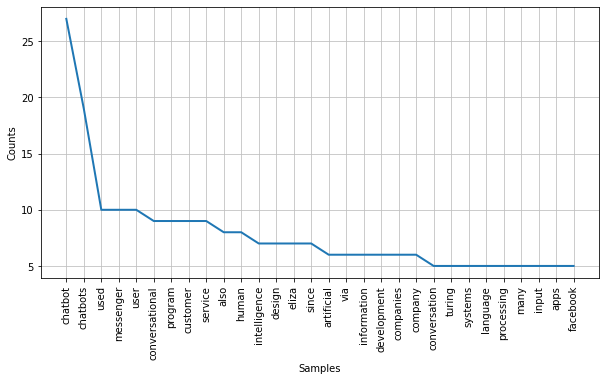

In [12]:
plt.figure(figsize=(10, 5))

fdist.plot(30, cumulative=False)
plt.show();

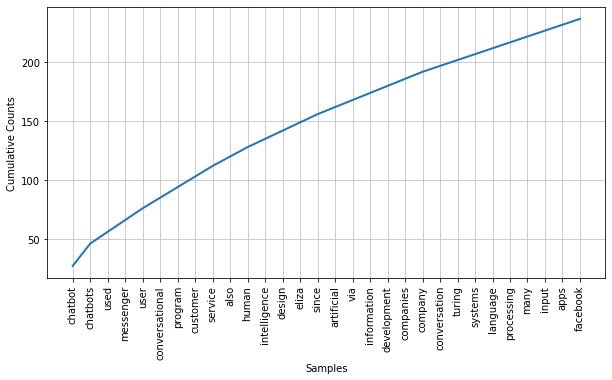

In [13]:
plt.figure(figsize=(10, 5))
fdist.plot(30, cumulative=True);

## Preprocessing
1. Stopwords
2. Lemmatization & Stemming

In [14]:
ps = PorterStemmer()

# apply the stemmer to our words list
stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))

# create a list of orginal words and stemmed words for comparison
stemmed_list =[]
for w1, w2 in zip(filtered_words, stemmed_words):
    if w1 != w2:
        stemmed_list.append((w1,w2))
        
print("Filtered Sentences word count:", len(filtered_words))
print("Stemmed Sentences word count:", len(stemmed_list))

# see how words were stemmed
print('\n first 10 stemmed words:')
stemmed_list[:10]

Filtered Sentences word count: 1172
Stemmed Sentences word count: 727

 first 10 stemmed words:


[('interactive', 'interact'),
 ('artificial', 'artifici'),
 ('conversational', 'convers'),
 ('entity', 'entiti'),
 ('computer', 'comput'),
 ('artificial', 'artifici'),
 ('intelligence', 'intellig'),
 ('conducts', 'conduct'),
 ('conversation', 'convers'),
 ('auditory', 'auditori')]

**Stemming Notes:**. There are some great examples of stemming in the list.  Often with stemming, the word is reduced, but it ends up with a form that isn't actually a word.  Such as `artificial` reducing to `artifici` and `computer` to `comput`.

In [15]:
lem = WordNetLemmatizer()

# apply the lemmatization to our words list
lemm_words=[]
for w in filtered_words:
    lemm_words.append(lem.lemmatize(w, 'v')) # use verb as pos

# create a list of orginal words and stemmed words for comparison
lemm_list =[]
for w1, w2 in zip(filtered_words, lemm_words):
    if w1 != w2:
        lemm_list.append((w1,w2))
        
print("Filtered Sentences word count:", len(filtered_words))
print("Lemmatized Sentences word count:", len(lemm_list))

print('\n First 20 Lemmatized words:')
lemm_list[:20]

Filtered Sentences word count: 1172
Lemmatized Sentences word count: 233

 First 20 Lemmatized words:


[('known', 'know'),
 ('conducts', 'conduct'),
 ('programs', 'program'),
 ('designed', 'design'),
 ('passing', 'pass'),
 ('used', 'use'),
 ('purposes', 'purpose'),
 ('including', 'include'),
 ('sophisticated', 'sophisticate'),
 ('processing', 'process'),
 ('matching', 'match'),
 ('wording', 'word'),
 ('coined', 'coin'),
 ('accessed', 'access'),
 ('messaging', 'message'),
 ('classified', 'classify'),
 ('tools', 'tool'),
 ('games', 'game'),
 ('marketing', 'market'),
 ('shopping', 'shop')]

**Lemmatazation Notes:** Two things to notice in the Lemmatazaiton example to explain the difference.  First is that each word in the right side of the list is actually a word.  All of them make sense.  The second is that certain examples when reduced to their lemma take a different form than simply removing characters from the front or back.  For example, `including` is now `include` and `messaging` is now `message`.

This processed used *verb* as the part of speech.

In [16]:
lemm_words=[]
for w in filtered_words:
    lemm_words.append(lem.lemmatize(w, 'n')) # use noun as pos

# create a list of orginal words and stemmed words for comparison
lemm_list =[]
for w1, w2 in zip(filtered_words, lemm_words):
    if w1 != w2:
        lemm_list.append((w1,w2))
        
print("Filtered Sentences word count:", len(filtered_words))
print("Lemmatized Sentences word count:", len(lemm_list))

print('\n First 20 Lemmatized words:')
lemm_list[:20]

Filtered Sentences word count: 1172
Lemmatized Sentences word count: 154

 First 20 Lemmatized words:


[('conducts', 'conduct'),
 ('methods', 'method'),
 ('programs', 'program'),
 ('systems', 'system'),
 ('purposes', 'purpose'),
 ('systems', 'system'),
 ('systems', 'system'),
 ('assistants', 'assistant'),
 ('organizations', 'organization'),
 ('websites', 'website'),
 ('categories', 'category'),
 ('tools', 'tool'),
 ('games', 'game'),
 ('sports', 'sport'),
 ('utilities', 'utility'),
 ('users', 'user'),
 ('machines', 'machine'),
 ('ways', 'way'),
 ('workings', 'working'),
 ('stands', 'stand')]

**Note:** Similar Process as above but using nouns as the Part of Speech.  You can see the same process, but with different word in their Noun form such as `utilities` to `utility`.

In [17]:
stemmed_words = [ps.stem(word) for word in filtered_words]

In [18]:
fdist = FreqDist(stemmed_words)
fdist.most_common(10)

[('chatbot', 46),
 ('use', 23),
 ('convers', 16),
 ('program', 14),
 ('user', 14),
 ('design', 12),
 ('compani', 12),
 ('servic', 11),
 ('process', 11),
 ('develop', 11)]

**Note:** After the stemming is completed on the `filtered_words` list, the duplicate `chatbot` has been reduced and words are in their stemmed format.  Note that `use` and `user` are different.  One is a noun and one is a verb.

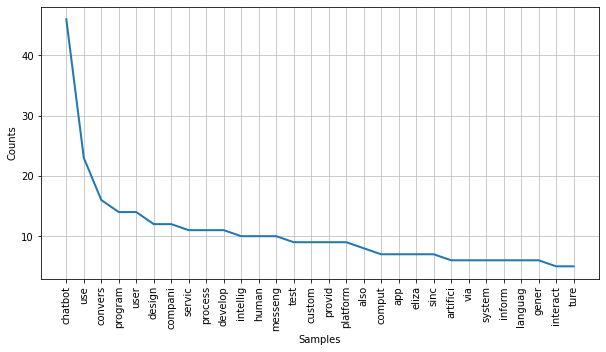

In [19]:
plt.figure(figsize=(10, 5))

fdist.plot(30, cumulative=False)
plt.show();

**Note:**  A slightly different shapped graph now that `stemming` is completed.

## Named Entity Recoginition

In [20]:
#tokenize sentences from the news article
tokenized_sent = sent_tokenize(raw_orig)

# review a specific setence
for s in tokenized_sent[5:6]:
    print(s)
    print('\n')
    
    # word tokenize and pos tagging
    word = pos_tag(word_tokenize(s))
    
    # chunking using named entity chunker
    res_chunks = ne_chunk(word)
    
    # Return a list of 3-tuples containing (word, tag, IOB-tag) eg:  [(token, pos_tag, name_entity_tag)] 
    print(tree2conlltags(res_chunks))
    print('\n')

Chatbots can be classified into usage categories such as conversational commerce (e-commerce via chat), analytics, communication, customer support, design, developer tools, education, entertainment, finance, food, games, health, HR, marketing, news, personal, productivity, shopping, social, sports, travel and utilities.


[('Chatbots', 'NNS', 'O'), ('can', 'MD', 'O'), ('be', 'VB', 'O'), ('classified', 'VBN', 'O'), ('into', 'IN', 'O'), ('usage', 'JJ', 'O'), ('categories', 'NNS', 'O'), ('such', 'JJ', 'O'), ('as', 'IN', 'O'), ('conversational', 'JJ', 'O'), ('commerce', 'NN', 'O'), ('(', '(', 'O'), ('e-commerce', 'JJ', 'O'), ('via', 'IN', 'O'), ('chat', 'NN', 'O'), (')', ')', 'O'), (',', ',', 'O'), ('analytics', 'NNS', 'O'), (',', ',', 'O'), ('communication', 'NN', 'O'), (',', ',', 'O'), ('customer', 'NN', 'O'), ('support', 'NN', 'O'), (',', ',', 'O'), ('design', 'NN', 'O'), (',', ',', 'O'), ('developer', 'NN', 'O'), ('tools', 'NNS', 'O'), (',', ',', 'O'), ('education', 'NN', 'O'), (',', '

In [21]:
person = []
org = []
gpe = []
ner_types = set()

for s in tokenized_sent:
    pos = pos_tag(word_tokenize(s))
    res_chunks = ne_chunk(pos)

    for i in tree2conlltags(res_chunks):
        ner = i[2]
        if ner == 'O':  # skip Outiside labels
            continue;
        ner_types.add(ner) # Create a set of unique entries to ensure none are missing
        if ner.find('PERSON')> -1:   # matches on I-PERSON, B-PERSON
            person.append(ner)
        elif ner.find('ORGANIZATION') > -1:
            org.append(ner)
        elif ner.find('GPE') >-1:
            gpe.append(ner)  

In [22]:
ner_types

{'B-GPE', 'B-ORGANIZATION', 'B-PERSON', 'I-GPE', 'I-ORGANIZATION', 'I-PERSON'}

In [23]:
print('PERSON:', len(person))
print('ORGANIZATION:', len(org))
print('GPE:', len(gpe))

PERSON: 52
ORGANIZATION: 70
GPE: 33


## Noun Phrase Chunking